In [110]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from os import listdir
import re

In [3]:
df=pd.read_csv('soft_pf0.1_sp100_lp100_reduced10_filament.orientation_corr',skiprows=1,delim_whitespace=True)

In [163]:
df['orientation_corr_var'] = df['orientation_corr_sem'].apply(lambda y: y**2)

<Figure size 432x288 with 0 Axes>

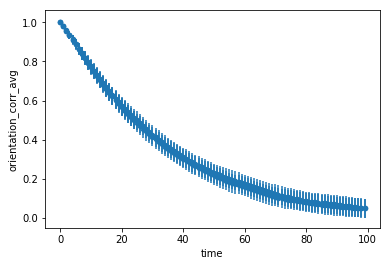

In [164]:
plt.figure()
df.plot(x='time',y='orientation_corr_avg',yerr='orientation_corr_sem',kind='scatter')
plt.show()

In [165]:
gb=df.groupby('time')
x=df.time.unique()
y=gb.orientation_corr_avg.mean()
ysem=np.sqrt(gb.orientation_corr_var.mean())
model=sm.GLM(y, x, family=sm.families.Gaussian(sm.families.links.log))
fit=model.fit()
tau=-1.0/fit.params.x1
print("tau = %2.5f" % tau)

tau = 34.13358


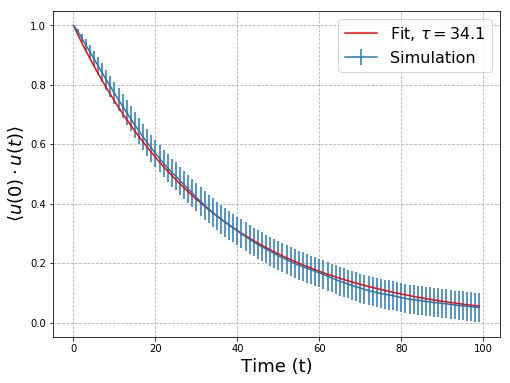

In [166]:
fig,ax = plt.subplots(1,1,figsize=(8,6))
ax.errorbar(x,y,yerr=ysem)
theory = lambda t: np.exp(-t/tau)
ax.plot(x,theory(x),'r')
ax.set_ylabel(r"$\langle u(0)\cdot u(t)\rangle$",fontsize=18)
ax.set_xlabel("Time (t)",fontsize=18)
ax.legend([r"Fit, $\tau=%2.1f$" % tau,'Simulation'],fontsize=16)
ax.grid(True,linestyle='--')

In [ ]:
df=pd.read_csv('soft_pf0.1_sp100_lp100_reduced10_filament.orientation_corr',skiprows=1,delim_whitespace=True)

In [150]:
dirName='.'
fileNames = [dirName + '/'+i for i in listdir(dirName) if i[-17:] == '.orientation_corr']

if len(fileNames)==0:
    print("No '.orientation_corr' files found in directory '"+dirName+"'.")

D = {"file_name" : []}
for index,name in enumerate(fileNames):
    f = open(name,'r')
    for i in range(2): colNames = f.readline().split()
    if index == 0:
        for colName in colNames:
            D[colName] = []
    D["file_name"].append(name)
    simParams = f.readline().split()
    for colIndex,colName in enumerate(colNames):
        D[colName].append(float(simParams[colIndex]))
    f.close()
#df = pd.DataFrame(D)

In [151]:
fileNames

['./soft_pf0.1_sp100_lp100_reduced10_filament.orientation_corr',
 './soft_pf0.4_sp015_lp020_reload001_reduced10_filament.orientation_corr',
 './soft_pf0.4_sp015_lp020_reload002_reduced10_filament.orientation_corr',
 './soft_pf0.4_sp015_lp020_reload003_reduced10_filament.orientation_corr',
 './soft_pf0.4_sp015_lp020_reload004_reduced10_filament.orientation_corr',
 './soft_pf0.4_sp015_lp020_reload005_reduced10_filament.orientation_corr',
 './soft_pf0.4_sp015_lp020_reload006_reduced10_filament.orientation_corr',
 './soft_pf0.4_sp015_lp020_reload007_reduced10_filament.orientation_corr',
 './soft_pf0.4_sp015_lp020_reload008_reduced10_filament.orientation_corr',
 './soft_pf0.4_sp015_lp020_reload009_reduced10_filament.orientation_corr',
 './soft_pf0.4_sp015_lp020_reload010_reduced10_filament.orientation_corr',
 './soft_pf0.4_sp025_lp020_reload001_reduced10_filament.orientation_corr',
 './soft_pf0.4_sp025_lp020_reload002_reduced10_filament.orientation_corr',
 './soft_pf0.4_sp025_lp020_reload00

In [152]:
s=set()
for i in fileNames:
    matchObj = re.search('soft_pf0.\d{1,2}_sp\d{3}_lp\d{3}', i)
    #matchObj = re.search('soft_pf0.\d{1,2}_l\d{3}_d\d{3}_sp\d{3}_lp\d{3}',i)
    if (matchObj != None):
        s.add(matchObj.group())
if (len(s) == 0):
    print('No match found')

In [185]:
dfs = {}
for i in s:
    dfs[i] = None
    for j in fileNames:
        if (j[2:len(i)+2]==i):
            if (type(dfs[i]) == type(None)):
                dfs[i] = pd.read_csv(j,skiprows=1,delim_whitespace=True)
            else:
                dfs[i] = dfs[i].append(pd.read_csv(j,skiprows=1,delim_whitespace=True),ignore_index=True)

tau = 34.21986
tau = 15.78981


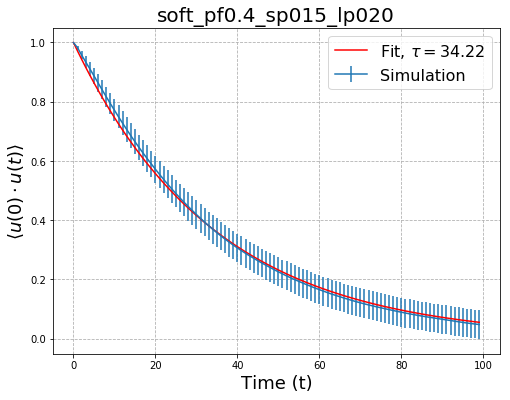

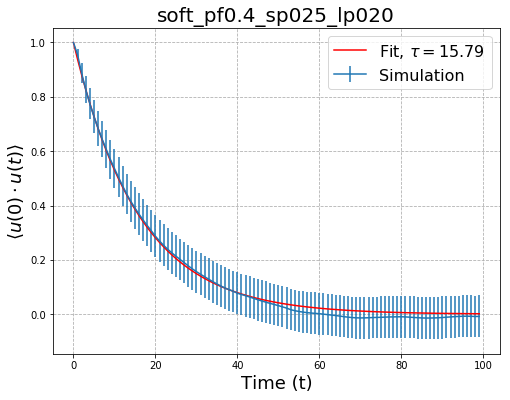

In [197]:
for fname,df in zip(dfs.keys(),dfs.values()):
    if('pf0.1' in fname):
        continue
    df['orientation_corr_var'] = df['orientation_corr_sem'].apply(lambda y: y**2)
    gb=df.groupby('time')
    x=df.time.unique()
    y=gb.orientation_corr_avg.mean()
    ysem=np.sqrt(gb.orientation_corr_var.mean())
    model=sm.GLM(y, x, family=sm.families.Gaussian(sm.families.links.log))
    fit=model.fit()
    tau=-1.0/fit.params.x1
    print("tau = %2.5f" % tau)
    fig,ax = plt.subplots(1,1,figsize=(8,6))
    ax.errorbar(x,y,yerr=ysem)
    theory = lambda t: np.exp(-t/tau)
    ax.plot(x,theory(x),'r')
    ax.set_ylabel(r"$\langle u(0)\cdot u(t)\rangle$",fontsize=18)
    ax.set_xlabel("Time (t)",fontsize=18)
    ax.legend([r"Fit, $\tau=%2.2f$" % tau,'Simulation'],fontsize=16)
    ax.grid(True,linestyle='--')
    ax.set_title(fname,fontsize=20)

In [188]:
for df in dfs:
    print(df)

soft_pf0.4_sp015_lp020
soft_pf0.1_sp100_lp100
soft_pf0.4_sp025_lp020


In [191]:
dfs.values()

dict_values([      time  orientation_corr_avg  orientation_corr_sem
0        0              1.000000              0.000000
1        1              0.981794              0.006307
2        2              0.956562              0.013781
3        3              0.933035              0.019348
4        4              0.910070              0.023673
5        5              0.886706              0.027145
6        6              0.863393              0.029800
7        7              0.840195              0.032009
8        8              0.816942              0.034213
9        9              0.794109              0.036144
10      10              0.771653              0.037953
11      11              0.749524              0.039354
12      12              0.727871              0.040461
13      13              0.706487              0.041416
14      14              0.685204              0.042424
15      15              0.664304              0.043371
16      16              0.643705              0.0441